In [ ]:
import os
from PIL import Image
import numpy as np
from form_radiometry import *

def verify_image_properties(image_path):
    with Image.open(image_path) as img:
        # Print the image mode
        print(f"Image mode: {img.mode}")
        
        # Optionally convert image mode to ensure we're checking the actual data format
        if img.mode == 'I;16':
            img = img.convert('I')  # Convert 16-bit unsigned to 32-bit signed integer
            print(f"Converted image mode: {img.mode}")

        # Convert to numpy array to check ndim and dtype
        img_array = np.array(img)

        # Check ndim
        ndim = img_array.ndim
        print(f"ndim: {ndim}")

        # Check if image is 16-bit
        is_16bit = img_array.dtype == np.uint16
        print(f"Is 16-bit: {is_16bit}")

        return ndim == 2 and is_16bit


In [ ]:
DATA_INTENSITY_DIR = os.path.join("data", "background_lf", "intensity")
DATA_PROC_DIR = os.path.join("data", "background_lf", "processed")

In [ ]:
intensity_images = load_images(DATA_INTENSITY_DIR)

In [ ]:
min_vals = [np.min(image) for image in intensity_images]
max_vals = [np.max(image) for image in intensity_images]
print("Min values of input images:", min_vals)
print("Max values of input images:", max_vals)

In [ ]:
img_array = intensity_images[0]
ndim = img_array.ndim
print(f"ndim: {ndim}")
is_16bit = img_array.dtype == np.uint16
print(f"Is 16-bit: {is_16bit}")

In [ ]:
intensity_avg_filename = os.path.join(DATA_PROC_DIR, "bg_intensity_avg.tif")
verify_image_properties(intensity_avg_filename)

Verify file path exists

In [ ]:
file_path = 'data\\background_lf\\processed\\bg_intensity_avg.tif'
# file_path = 'C:\\Users\\Geneva\\Documents\\Code\\pol-analyze\\data\\background_lf\\processed\\bg_intensity_avg.tif'
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    print(f"File exists: {file_path}")

### Find a good threshold

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

In [ ]:
with Image.open(intensity_avg_filename) as img:
    intensity_avg = np.array(img)

In [ ]:
type(intensity_avg)
minimum = np.min(intensity_avg)
maximum = np.max(intensity_avg)
mean = np.mean(intensity_avg)
print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")
print(f"Mean: {mean}")

In [ ]:
ths = 0.30
intensity_avg_thresholded = threshold_image(intensity_avg, ths=ths)
display_image(intensity_avg_thresholded, f'Average Intensity Image Thresholded at {ths}')

In [ ]:
def update_threshold(threshold_value):
    ths_cutoff = int(threshold_value * 65535)
    intensity_avg_thresholded = np.zeros_like(intensity_avg[:100, :100])
    intensity_avg_thresholded[intensity_avg[:100, :100] > ths_cutoff] = 1
    
    plt.imshow(intensity_avg_thresholded, cmap='gray')
    plt.title(f'Threshold Value: {threshold_value}')
    plt.axis('off')
    plt.show()

# Create a slider widget for threshold adjustment
threshold_slider = widgets.FloatSlider(
    value=0.3,  # Initial threshold value
    min=0,
    max=1.0,
    step=0.01,
    description='Threshold:',
    continuous_update=True  # Only update the image when the slider is released
)

In [ ]:
interactive_plot = interactive(update_threshold, threshold_value=threshold_slider)
display(interactive_plot)

# Open thresholded image

In [ ]:
threshold_image_filename = os.path.join(DATA_PROC_DIR, "bg_intensity_avg_ths_30.tif")
with Image.open(threshold_image_filename) as img:
    ths_image = np.array(img)

In [ ]:
print(f"Type: {type(ths_image)}, dtype: {ths_image.dtype}, shape: {ths_image.shape}")
minimum = np.min(ths_image)
maximum = np.max(ths_image)
mean = np.mean(ths_image)
print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")
print(f"Mean: {mean}")

In [ ]:
display_image(ths_image, 'Opened Thresholded Image')

In [ ]:
scaled_image = ths_image * 255  # Convert 1s to 255
# tifffile.imwrite('binary_image_visual.tif', scaled_image)

# Look at previously generated retardance images

In [10]:
import os
import tifffile
from utils import display_image, display_image_with_mla_grid

In [6]:
ret_image = tifffile.imread(os.path.join('tmp_data', 'retardance_mla66.tif'))

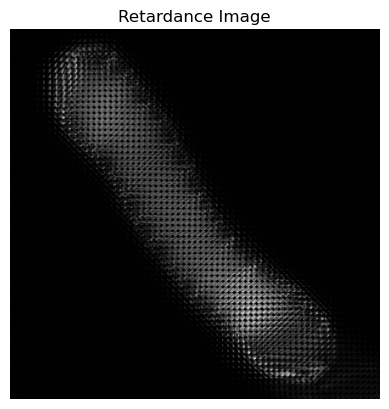

In [9]:
display_image(ret_image, 'Retardance Image')

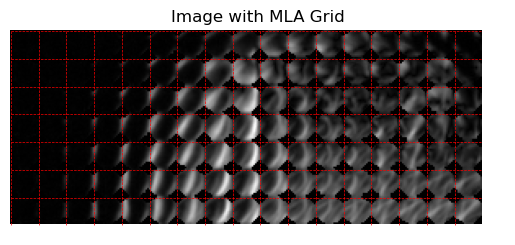

In [20]:
display_image_with_mla_grid(ret_image[17*3:17*10, 17*3:17*20], 17)

In [14]:
ret_image_16pix = tifffile.imread(os.path.join('data', 'lf_processed_final', 'cropped_02_15_65_65', 'retardance_masked.tif'))

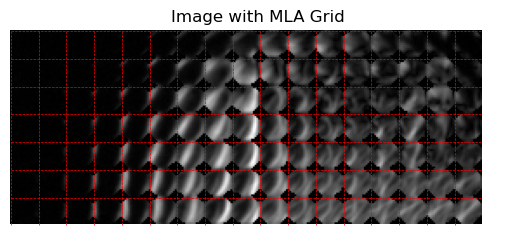

In [24]:
display_image_with_mla_grid(ret_image_16pix[16*3:16*10, 16*8:16*25], 16)